In [1]:
import quantumpropagator as qp
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
from ipywidgets import interact,fixed #, interactive, fixed, interact_manual
import ipywidgets as widgets
import os
import glob
import pandas as pd
#%matplotlib notebook
%matplotlib ipympl

plt.rcParams.update({'font.size': 10})

In [2]:
fol = '/home/alessio/Desktop/Dropbox/USA/bet/'
subfolders = sorted([dir for dir in os.listdir(fol) if os.path.isdir(os.path.join(fol,dir)) and dir != os.path.join(fol,'.ipynb_checkpoints')])
print(''.join(['{} -> {}\n'.format(a,b) for a,b in enumerate(subfolders)]))

0 -> b-pulseAlongX_0.22_goodG_0000
1 -> b-pulseAlongX_0.22_short_0_goodG_0000
2 -> b-pulseAlongX_0.22_short_pi_goodG_0000
3 -> c-Experiments_on_Nac_0000
4 -> d-experiments_smooth01_0000
5 -> d-experiments_smooth10_0000
6 -> d-experiments_smooth50_0000
7 -> h-IR-X_80_0000
8 -> i-IR-Z_80_0000
9 -> k-IR-Y_80_0000
10 -> l-IR-XZ-50_0000
11 -> l-IR-XZ-70_0000
12 -> l-IR-XZ-90_0000
13 -> m-only_IR_longer_with_nac_2_1_0000
14 -> m-only_IR_longer_with_nac_2_1_counterClock_0000
15 -> m-only_IR_longer_with_nac_2_1_inverted_phase_0000
16 -> m-only_IR_longer_with_nac_2_1_phase_pi_0000
17 -> m-only_IR_middle100_0000
18 -> m-only_IR_middle140_0000
19 -> m-only_IR_middle50_0000
20 -> m-only_IR_middle80_0000
21 -> m-only_IR_middle90_0000
22 -> m-only_IR_retarded75_0000
23 -> m-only_IR_retarded80_0000
24 -> m-only_IR_retarded85_0000
25 -> m-only_IR_retarded90_0000
26 -> m-only_IR_short_with_nac_2_1_0000
27 -> m-only_IR_short_with_nac_2_1_inverted_phase_0000
28 -> m-only_IR_short_with_nac_2_1_phase_pi_00

In [3]:
i_want = [0]
selected = [ subfolders[i] for i in i_want ]

In [14]:
viridis = cm.get_cmap('hsv',12)
colors = viridis(np.linspace(0,1, len(i_want)+1))

def graph_between_bonds(folder_list):
    fig, [ax0,ax1] = plt.subplots(2,1,figsize=(10,10))
    
    
    for i, this_folder in enumerate(folder_list):
        abs_path = os.path.join(fol,this_folder)
        fir_file = os.path.join(abs_path, 'list_first.dat')
        sec_file = os.path.join(abs_path, 'list_second.dat')
        population_file = os.path.join(abs_path, 'outputPopul')
        dataP = pd.read_csv(population_file, delim_whitespace=True, header=None)
        fir = np.loadtxt(fir_file)
        sec = np.loadtxt(sec_file)
        norm = 0.317460*0.317460*0.317460
        ax0.plot(fir[:,0],fir[:,1]*norm, color=colors[i], ls='-', label='{} single bond'.format(this_folder))
        ax0.plot(sec[:,0],sec[:,1]*norm, color=colors[i], ls='--', label='{} double bond'.format(this_folder))
        ax1.plot(dataP[0],dataP[2], color=colors[i], ls='-', label=r'{} $S_1$'.format(this_folder))
    
    ax1.set_ylim([0,1.01])
    ax0.legend()
    ax1.legend()
    ax0.set_title(this_folder)
    ax0.set_xlabel('fs')
    ax0.set_ylabel('Fraction of 50 electrons')
    
    fig.tight_layout()
        
graph_between_bonds(selected)

A Jupyter Widget

# Blender visualizer

In [2]:
file_geom = '/home/alessio/densities/prova_bonds_cylinder/geoms.p'

geoms = qp.pickleLoad(file_geom)


# Prima prova

In [11]:
%%bash

/home/alessio/prova_bonds_cylinder/graphs/sync.sh

bash: line 2: /home/alessio/prova_bonds_cylinder/graphs/sync.sh: No such file or directory


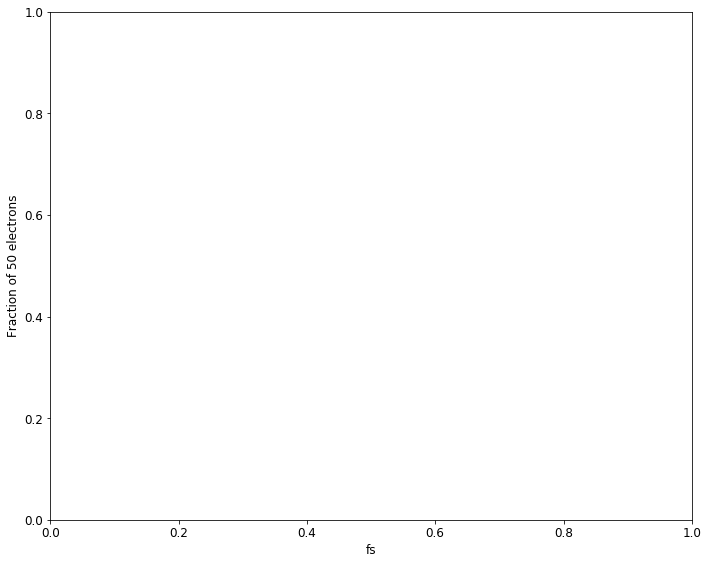

In [12]:
folddat = '/home/alessio/prova_bonds_cylinder/graphs'

files_dat = glob.glob(folddat + '/old/*.dat')
files_dat = glob.glob(folddat + '/0.6/*.dat')
#files_dat = glob.glob(folddat + '/new_withr_c-0.6-r_s-0.6-cs-0.0/*.dat')

matplotlib.rcParams.update({'font.size': 12})

data = [ np.loadtxt(i) for i in files_dat ]

fig, ax0 = plt.subplots(1,1,figsize = (10,8))

colors = ['b','r','g','c']
labels = ['single','double','C9 sphere','C8 sphere']

for i, this_data in enumerate(data):
    ax0.plot(this_data[:,0],this_data[:,1], label='UV {}'.format(labels[i]), color=colors[i])


ax0.set_xlabel("fs")
ax0.set_ylabel('Fraction of 50 electrons')
ax0.legend()
fig.tight_layout()

# from pickle to vmd

In [21]:
filename = '/home/alessio/prova_bonds_cylinder/second_first.p'
#filename = '/home/alessio/prova_bonds_cylinder/CANCELLAMI/r-0.6-cyc-0.6/r-0.6-cyc-0.6-lists.p'
diction = qp.pickleLoad(filename)

selection = diction['list_1']

new_index = 32590

geom = flat_geoms[new_index]
new_first = selection[new_index]
selected_grids = list_of_points_in_3d[new_first]

qp.saveTraj(np.array([geom]),['C','C','C','H','H','H','H','C','C','C','C','H','H','H','H'],'/home/alessio/prova_bonds_cylinder/new_norb', True)
n_gridpoints, _ = selected_grids.shape
atomT = ['H']*n_gridpoints
qp.saveTraj(np.array([selected_grids]), atomT, '/home/alessio/prova_bonds_cylinder/new_first',True)

FileNotFoundError: [Errno 2] No such file or directory: '/home/alessio/prova_bonds_cylinder/second_first.p'

# On the new ones

In [3]:
%%bash
/home/alessio/densities/From_pinot/sync.sh


bash: line 1: /home/alessio/densities/From_pinot/sync.sh: No such file or directory


CalledProcessError: Command 'b'/home/alessio/densities/From_pinot/sync.sh\n'' returned non-zero exit status 127.

In [15]:
folddat = '/home/alessio/densities/From_pinot/calculationZ/r_c-1.6-non-overlapping/ALL'
folddat = '/home/alessio/densities/From_pinot/calculationZ/r_c_1.4-non-overlapping/ALL'
# folddat = '/home/alessio/densities/From_pinot/calculationZ/r_c-1.2-non-overlapping/ALL'
# folddat = '/home/alessio/densities/From_pinot/calculationZ/r_c-1.0-non-overlapping/ALL'

subfolders = sorted([dir for dir in os.listdir(folddat) if os.path.isdir(os.path.join(folddat,dir))])
print(''.join(['{} -> {}\n'.format(a,b) for a,b in enumerate(subfolders)]))

0 -> b-UV-0.22_0000
1 -> m-IR-Polarized-INV_0000
2 -> m-IR-Polarized-LON_0000
3 -> m-IR-Polarized-NOR_0000
4 -> position-from1_0000
5 -> position-from2_0000
6 -> position-from3_0000
7 -> position-from4_0000
8 -> position-from5_0000
9 -> t-FC_excited_phi_0000
10 -> t-IR-to-excite-phi_0000
11 -> t-UV-0.22_excited_phi_0000
12 -> t-UV-0.22_excited_phi_0001
13 -> z-from1_0000



In [17]:
select_these = [0]

lts = ['-',':','--']
fol_lab = ['UV', 'IR INV','IR LONG', 'IR NOR', 'P1', 'P2', 'P3', 'P4', 'P5', 'FC-excite', 'To excite', 'shit', 'UV-excite', 'FC']
#fol_lab = ['UV','IR LONG', 'IR INV']


fig, ax0 = plt.subplots(1,1,figsize = (18,8))


for ii,i in enumerate(select_these):
    subdir = os.path.join(folddat,subfolders[i])
    files_dat = sorted([ os.path.join(subdir,x) for x in os.listdir(subdir) if x[-4:] == '.dat' and x[0] == 'l'])
    #print(files_dat)
    data = [ np.loadtxt(i) for i in files_dat ]

    
    colors = ['r','b']
    labels = ['red','blue']

    for j, this_data in enumerate(data):
        ax0.plot(this_data[:,0],this_data[:,1], label='{} {}'.format(fol_lab[i], labels[j]), color=colors[j],linestyle=lts[ii])


#ax0.set_xlim([0,40])
ax0.set_xlabel("fs")
ax0.set_ylabel('Fraction of 4 electrons')
ax0.legend()
fig.tight_layout()

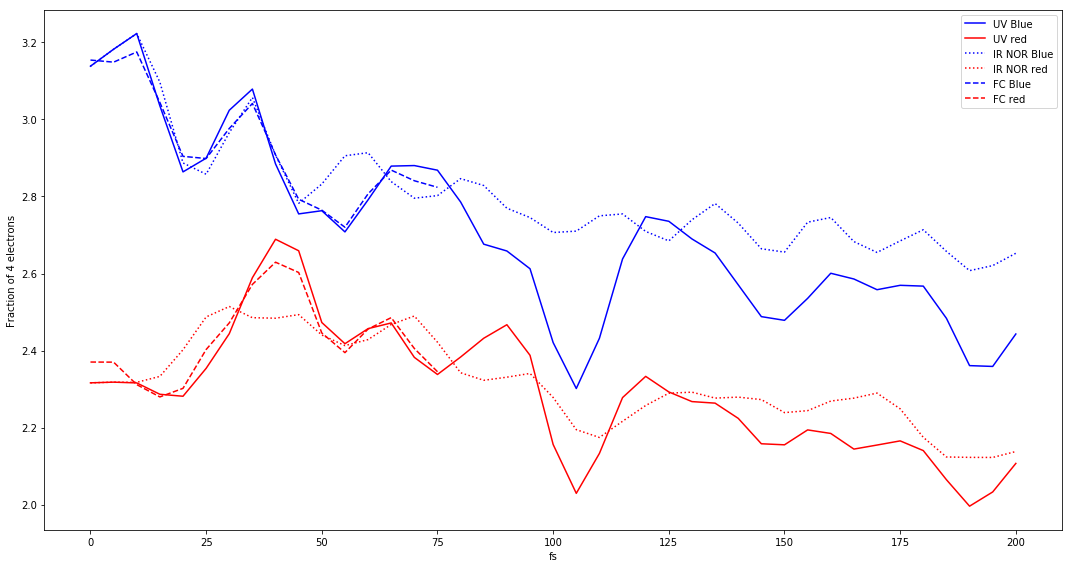

In [5]:
select_these = [0,3,13]

lts = ['-',':','--']
fol_lab = ['UV', 'IR INV','IR LONG', 'IR NOR', 'P1', 'P2', 'P3', 'P4', 'P5', 'FC-excite', 'To excite', 'shit', 'UV-excite', 'FC']


fig, ax0 = plt.subplots(1,1,figsize = (15,8))


for ii,i in enumerate(select_these):
    subdir = os.path.join(folddat,subfolders[i])
    files_dat = [ os.path.join(subdir,x) for x in os.listdir(subdir) if x[-4:] == '.dat']

    data = [ np.loadtxt(i) for i in files_dat ]

    
    colors = ['b','r','k','dimgray']
    labels = ['Blue','red','C9 sphere','C8 sphere']

    for j, this_data in enumerate(data):
        ax0.plot(this_data[:,0],this_data[:,1], label='{} {}'.format(fol_lab[i], labels[j]), color=colors[j],linestyle=lts[ii])

#ax0.set_xlim([0,60])
ax0.set_xlabel("fs")
ax0.set_ylabel('Fraction of 4 electrons')
ax0.legend()
fig.tight_layout()

In [44]:
typez = 'ALL'
folddats = ['/home/alessio/densities/From_pinot/calculationZ/r_c-1.6-non-overlapping/{}/b-UV-0.22_0000'.format(typez),
            '/home/alessio/densities/From_pinot/calculationZ/r_c_1.4-non-overlapping/{}/b-UV-0.22_0000'.format(typez),
            '/home/alessio/densities/From_pinot/calculationZ/r_c-1.2-non-overlapping/{}/b-UV-0.22_0000'.format(typez),
            '/home/alessio/densities/From_pinot/calculationZ/r_c-1.0-non-overlapping/{}/b-UV-0.22_0000'.format(typez)]

lts = ['-',':','--','-.']
fol_lab = ['1.6','1.4','1.2','1.0']
fig, ax0 = plt.subplots(1,1,figsize = (15,8))

for ii,i in enumerate(folddats):
    files_dat = [ os.path.join(i,x) for x in os.listdir(i) if x[-4:] == '.dat']
    data = [ np.loadtxt(i) for i in files_dat ]
    
    colors = ['b','r']
    labels = ['Blue','red']

    for j, this_data in enumerate(data):
        ax0.plot(this_data[:,0],this_data[:,1], label='{} {}'.format(fol_lab[ii], labels[j]), color=colors[j],linestyle=lts[ii])

    ax0.set_xlabel("fs")
    ax0.set_ylabel('Fraction of 50 electrons')
    ax0.legend()
    fig.tight_layout()

A Jupyter Widget

In [45]:
typez = 'ACTIVE'
folddats = ['/home/alessio/densities/From_pinot/calculationZ/r_c-1.6-non-overlapping/{}/b-UV-0.22_0000'.format(typez),
            '/home/alessio/densities/From_pinot/calculationZ/r_c_1.4-non-overlapping/{}/b-UV-0.22_0000'.format(typez),
            '/home/alessio/densities/From_pinot/calculationZ/r_c-1.2-non-overlapping/{}/b-UV-0.22_0000'.format(typez),
            '/home/alessio/densities/From_pinot/calculationZ/r_c-1.0-non-overlapping/{}/b-UV-0.22_0000'.format(typez)]

lts = ['-',':','--','-.']
fol_lab = ['1.6','1.4','1.2','1.0']
fig, ax0 = plt.subplots(1,1,figsize = (15,8))

for ii,i in enumerate(folddats):
    files_dat = [ os.path.join(i,x) for x in os.listdir(i) if x[-4:] == '.dat']
    data = [ np.loadtxt(i) for i in files_dat ]
    
    colors = ['b','r']
    labels = ['Blue','red']

    for j, this_data in enumerate(data):
        ax0.plot(this_data[:,0],this_data[:,1], label='{} {}'.format(fol_lab[ii], labels[j]), color=colors[j],linestyle=lts[ii])

    ax0.set_xlabel("fs")
    ax0.set_ylabel('Fraction of 50 electrons')
    ax0.legend()
    fig.tight_layout()

A Jupyter Widget

# Mark high resolutions

In [42]:
files = glob.glob('/home/alessio/dox/Alessio-Francoise/Results_MD_October2019/UV/*overl*')
files

['/home/alessio/dox/Alessio-Francoise/Results_MD_October2019/UV/UV_BONDS_r_c_1.4-non-overlapping_ACTIVE.txt',
 '/home/alessio/dox/Alessio-Francoise/Results_MD_October2019/UV/UV_BONDS_r_c_1.4-non-overlapping_ALL.txt']

In [43]:
dfs = [ pd.read_csv(x, index_col=0) for x in files]

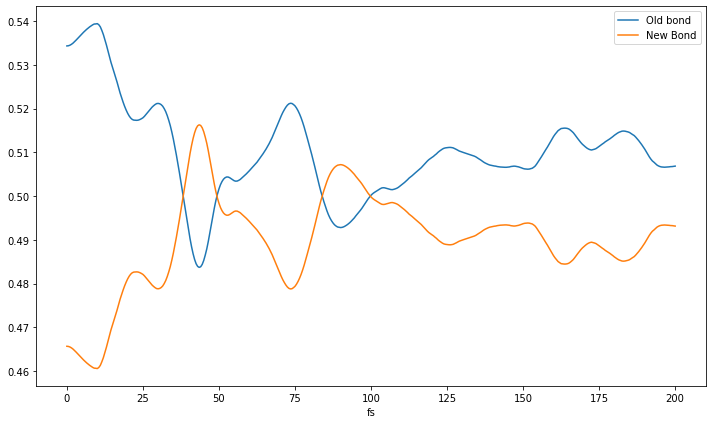

In [49]:
fig, ax0 = plt.subplots(1,1,figsize = (10,6))

ind = 1

x = dfs[ind]['Time']

norm = dfs[ind]['Old bond'] + dfs[ind]['New Bond']
#norm = 1
for y_label in ['Old bond', 'New Bond']:
    y = dfs[ind][y_label]
    ax0.plot(x,y/norm, label=y_label)

ax0.set_xlabel('fs')
ax0.legend()
fig.tight_layout()